# A Perfect Shuffle

## A Warmup

I'm sure you've come across situations where you need to shuffle a list or an array of elements, like in card games, creating randomized playlists, or selecting items randomly from a given set.

You might be tempted to use a naive approach like generating random pairs of indices and swapping the elements. However, this can lead to biased results, where some permutations are more likely to occur than others.

That's where the Fisher-Yates shuffle comes in. It's an elegant and efficient algorithm for generating a truly random permutation of a finite sequence.

The beauty of the Fisher-Yates shuffle is that it guarantees an unbiased shuffle, meaning that each possible permutation has an equal probability of being produced. Plus, it's super efficient, with a time complexity of O(n), where n is the number of elements in the list.

Now, you might be thinking, "Why should I learn this if it's already in the Python standard library?" Well, it's always helpful to understand the inner workings of commonly used algorithms. This not only deepens your knowledge but also allows you to appreciate the underlying principles and potentially apply them to other problems you encounter.



## A Naive Approach

I've personally written code like this and I'm pretty sure it made it to production.



In [3]:
import random


def naive_shuffle(arr, shuffle_thorughness=1.0):
    shuffle_count = int(shuffle_thorughness * len(arr))
    
    for _ in range(1, shuffle_count):
        i = random.randint(0, len(arr) - 1)
        j = random.randint(0, len(arr) - 1)
        arr[i], arr[j] = arr[j], arr[i]
    return arr


In my defense, I'm I'd like to think I recognized that this algorithm isn't good enough. It probably isn't doing enough shuffles, right? I probably increased `shuffle_thoroughness`.

## Is it wrong? Is it good enough?

Testing random number generation is tricky. How can we see if a utility for randomness is non-uniform?

Let's start by visualizing our naive algorithm.

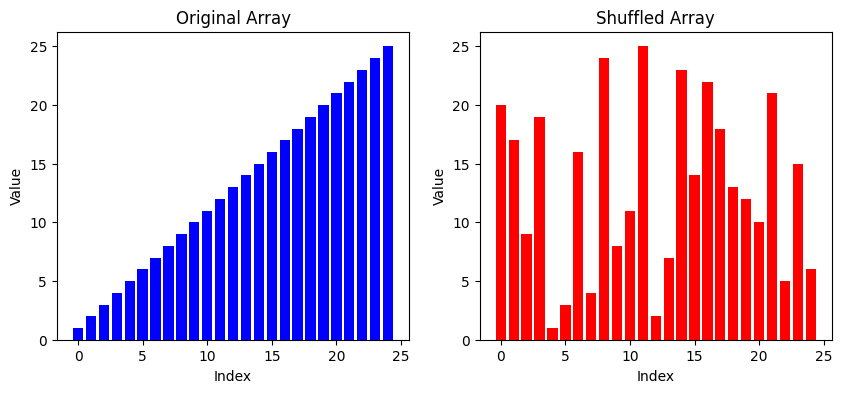

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_shuffle(arr):
    shuffled_arr = naive_shuffle(arr.copy())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    ax1.bar(range(len(arr)), arr, color='b')
    ax1.set_title("Original Array")
    ax1.set_xlabel("Index")
    ax1.set_ylabel("Value")
    
    ax2.bar(range(len(shuffled_arr)), shuffled_arr, color='r')
    ax2.set_title("Shuffled Array")
    ax2.set_xlabel("Index")
    ax2.set_ylabel("Value")
    
    plt.show()

arr = list(range(1, 26))
plot_shuffle(arr)


1. Run the shuffle above several times. Can you spot a flaw in the output?
2. Try modifying the function `naive_shuffle` by changing its `shuffle_thoroughness` variable to be smaller or larger than 1.
3. Try running it with `shuffle_thoroughness` set to 0.
4. Try 100.
5. Get out some paper or open a document. Describe in your own words your obervations of how well this algorithm works for its purpose and how fast or slow it is.

# A Better Visualization

Below you can run a simulation where we shuffle the array many times. We can observe a heat map of how often particular values appear in particular locations. Hopefully any subtle bias in our algorithm will reveal itself clearly.

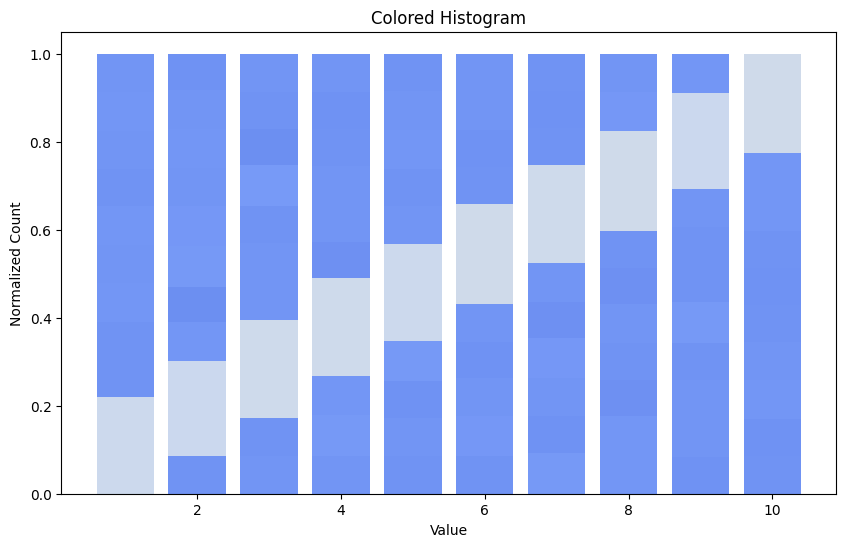

In [5]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

num_shuffles = 10000
shuffle_thoroughness = 1.0
over_expose = 2


def shuffle_counts(arr, num_shuffles):
    counts = np.zeros((len(arr), len(arr)))

    for _ in range(num_shuffles):
        shuffled_arr = naive_shuffle(arr.copy(), shuffle_thoroughness)
        for i, value in enumerate(shuffled_arr):
            counts[i][value-1] += 1

    return counts

def plot_colored_histogram(arr, num_shuffles):
    counts = shuffle_counts(arr, num_shuffles)
    normalized_counts = counts / num_shuffles

    fig, ax = plt.subplots(figsize=(10, 6))
    colormap = matplotlib.colormaps["coolwarm"]

    for i in range(len(arr)):
        for j in range(len(arr)):
            count = normalized_counts[i][j]
            color = colormap(over_expose * count)
            ax.bar(j + 1, count, bottom=np.sum(normalized_counts[:i, j]), color=color, alpha=1)

    ax.set_title("Colored Histogram")
    ax.set_xlabel("Value")
    ax.set_ylabel("Normalized Count")

    plt.show()

arr = list(range(1, 11))
plot_colored_histogram(arr, num_shuffles)

# Think

Tweak the parameters at the top of the simulation code block above and run it. Notice the patterns that you see.

Write on real paper or type into a real document the answers you have for these questions:

1. What is the smallest value for `shuffle_thoroughness` that you can use that reliably shuffles the whole array?
1. In your own words, why not just use a bigger value for `shuffle_thoroughness`? Why not 10x or 100x it? What is the downside?
1. Describe the pattern you see, in your own words, when `shuffle_thoroughness` is too low.
1. What are some properties that a better algorithm will have?

## What's wrong?

1. Non-uniform distribution: Since the algorithm chooses two random indices i and j for each iteration and simply swaps their values, there's a higher chance that *some elements will remain in their original positions*, or the resulting distribution will be non-uniform. A good shuffle algorithm should uniformly distribute the elements across all positions.
1. Limited number of swaps: The algorithm only performs a number of swaps equal or proportional to the length of the array. This may not be enough to fully shuffle the array.
1. Inefficient: In this algorithm, the number of iterations is directly proportional to the length of the array. Although this might seem efficient, the uniformity of the shuffle is not guaranteed, and increasing the number of iterations may not necessarily result in a more uniform distribution.

# A Better Answer

The Fisher-Yates shuffle algorithm, also known as the Knuth shuffle, is a big upgrade. The key features that make the Fisher-Yates shuffle algorithm special are:

Unbiasedness: The Fisher-Yates shuffle generates a truly unbiased random permutation of the input sequence. Each element has an equal probability of ending up in any position. The algorithm ensures that all possible permutations are equally likely, which is crucial for applications where fairness or true randomness is required, such as shuffling a deck of cards for a card game.

In-place shuffling: The algorithm shuffles the sequence in place, meaning that it does not require additional memory to store the shuffled sequence. This makes the algorithm memory-efficient, which is particularly beneficial when working with large sequences.

Time efficiency: The Fisher-Yates shuffle has a linear time complexity, O(n), where n is the number of elements in the sequence. This makes the algorithm fast and efficient for shuffling even large sequences.

Simplicity: The Fisher-Yates shuffle is straightforward to understand and easy to implement, requiring only a few lines of code in most programming languages. This simplicity makes it an attractive choice for programmers seeking an efficient and unbiased shuffling algorithm.


In [7]:
import random


def knuth_shuffle(arr):
    for i in range(len(arr) - 1, 0, -1):
        j = random.randint(0, i)
        arr[i], arr[j] = arr[j], arr[i]
    return arr

This implementation takes a list called sequence as input and shuffles it in place using the Fisher-Yates algorithm. The function iterates through the list in reverse order, starting from the last element and going to the first element. For each index in the array, it swaps that elelemnt with another randomly chosen element. This ensures that each element has an equal probability of ending up in any position.

We can see that it only makes a single pass over the array.

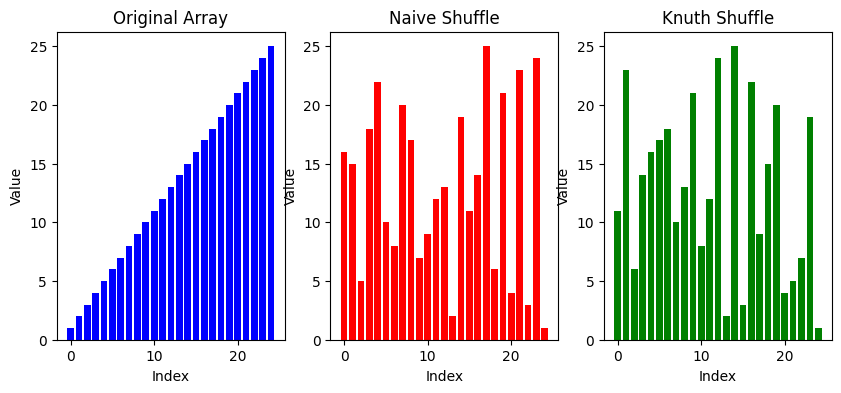

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_shuffle(arr):
    naive_shuffled_arr = naive_shuffle(arr.copy(), 1.0)
    knuth_shuffled_arr = knuth_shuffle(arr.copy())
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
    
    ax1.bar(range(len(arr)), arr, color='b')
    ax1.set_title("Original Array")
    ax1.set_xlabel("Index")
    ax1.set_ylabel("Value")
    
    ax2.bar(range(len(naive_shuffled_arr)), naive_shuffled_arr, color='r')
    ax2.set_title("Naive Shuffle")
    ax2.set_xlabel("Index")
    ax2.set_ylabel("Value")
    
    ax3.bar(range(len(knuth_shuffled_arr)), knuth_shuffled_arr, color='g')
    ax3.set_title("Knuth Shuffle")
    ax3.set_xlabel("Index")
    ax3.set_ylabel("Value")
    plt.show()

arr = list(range(1, 26))
plot_shuffle(arr)


Compare the two shuffles above. The difference in bias might not be apparent with a single shuffle.

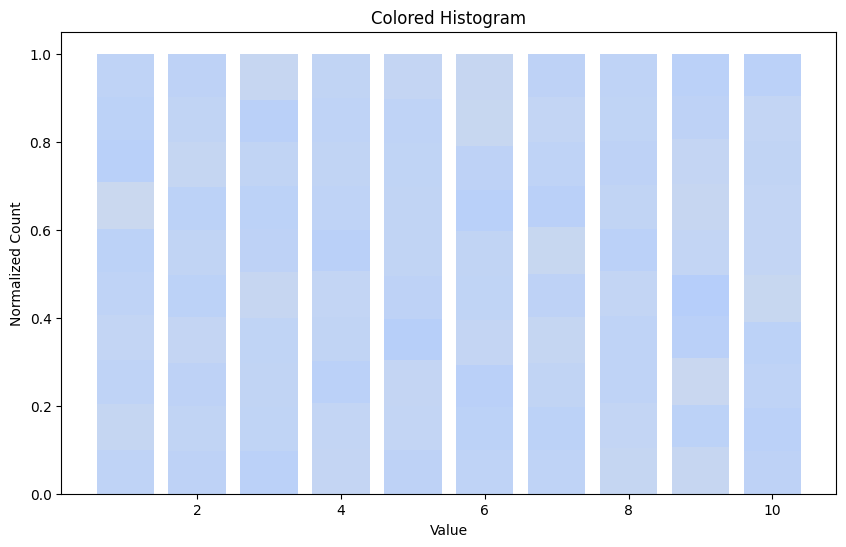

In [121]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

num_shuffles = 10000
over_expose = 4


def shuffle_counts(arr, num_shuffles):
    counts = np.zeros((len(arr), len(arr)))

    for _ in range(num_shuffles):
        shuffled_arr = knuth_shuffle(arr.copy())
        for i, value in enumerate(shuffled_arr):
            counts[i][value-1] += 1

    return counts

def plot_colored_histogram(arr, num_shuffles):
    counts = shuffle_counts(arr, num_shuffles)
    normalized_counts = counts / num_shuffles

    fig, ax = plt.subplots(figsize=(10, 6))
    colormap = matplotlib.colormaps["coolwarm"]

    for i in range(len(arr)):
        for j in range(len(arr)):
            count = normalized_counts[i][j]
            color = colormap(over_expose * count)
            ax.bar(j + 1, count, bottom=np.sum(normalized_counts[:i, j]), color=color, alpha=1)

    ax.set_title("Colored Histogram")
    ax.set_xlabel("Value")
    ax.set_ylabel("Normalized Count")

    plt.show()

arr = list(range(1, 11))
plot_colored_histogram(arr, num_shuffles)

# Think

Write on real paper or type into a real document the answers you have for these questions:

1. `knuth_shuffle` has no parameters like `shuffle_thoroughness`. Why?
1. Now that we have `knuth_shuffle` can you imagine any possible purpose for using the `naive_shuffle`?
1. Why is the `knuth_shuffle` (usually) better?
1. What could go wrong, elsewhere in the computer you ran this on, which could cause the `knuth_shuffle` to give biased results? If this happened, how would you know?

# Bias

Bias is a subtle problem that can affect outcomes of code that uses random numbers.

Bias can lead to skewed or unfair results that do not accurately represent the intended random behavior. In other words, when an algorithm is biased, some outcomes are more likely to occur than others, which can have undesirable consequences in various applications. Here are a few reasons why bias is problematic:

1. Statistical validity: In statistical analysis, randomness is used to select samples, design experiments, and perform tests. Biased randomness can compromise the validity of these analyses, leading to incorrect inferences and unreliable results.

1. Inaccurate representation: When using randomness for simulations or modeling real-world processes, it is essential to generate unbiased random numbers to accurately represent the underlying phenomena. Biased randomness can lead to incorrect conclusions and inaccurate predictions.

1. Security vulnerabilities: In cryptographic systems, randomness is used to generate keys, tokens, and other security elements. A biased random number generator can introduce vulnerabilities by making it easier for an attacker to predict or guess the generated values, thus compromising the security of the system.

1. Machine learning performance: In machine learning, unbiased random sampling is often used for splitting datasets into training and testing sets, initializing model parameters, and choosing optimization paths. Bias in these random selections can negatively impact the performance and generalizability of the machine learning models.

1. Unfairness: In applications like games, lotteries, or random selection processes, fairness is crucial to ensure that every participant or element has an equal chance of being selected. A biased algorithm can compromise this fairness, leading to an uneven distribution of chances and potentially giving an unfair advantage to certain participants or outcomes.

To avoid these issues, it is important to use unbiased algorithms when generating random numbers or performing random operations. This ensures that the intended randomness is accurately and fairly represented, leading to more reliable and valid results across a wide range of applications.

